# First encouter with PyTorch


Let us explore the basics of PyTorch.


This notebook is a modified version of [this](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) more extensive introduction to the language.

In [1]:
%matplotlib inline

### Import the torch library

In [2]:
# !pip install torchsummary

In [3]:
import torch
from torchsummary import summary

In [4]:
device = torch.device('cpu')
#device = torch.device('cuda') # Uncomment this to run on GPU

### Create artificial dataset


In [5]:
n = 1000

din = 100 # input dimension
dh = 30 # hidden layer dimension
dout = 10 # output dimension

In [6]:
input_size = (din,)

In [7]:
# create random tensors
x = torch.randn(n, din, device=device)
y = torch.randn(n, dout, device=device)

In [8]:
?torch.randn

In [9]:
print(x.shape, y.shape)

torch.Size([1000, 100]) torch.Size([1000, 10])


### Define a simple network

In [10]:
model = torch.nn.Sequential(
          torch.nn.Linear(din, dh, bias=True),
          torch.nn.Sigmoid(),
          torch.nn.Linear(dh, dout),
        ).to(device)

In [11]:
print(model)

Sequential(
  (0): Linear(in_features=100, out_features=30, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=30, out_features=10, bias=True)
)


In [12]:
summary(model, input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]           3,030
           Sigmoid-2                   [-1, 30]               0
            Linear-3                   [-1, 10]             310
Total params: 3,340
Trainable params: 3,340
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [13]:
d1 = 100
d2 = 30

model2 = torch.nn.Sequential(
          torch.nn.Linear(din, d1, bias=True),
          torch.nn.Sigmoid(),
          torch.nn.Linear(d1, d2, bias=True),
          torch.nn.Sigmoid(),
          torch.nn.Linear(d2, dout),
        ).to(device)

In [14]:
summary(model2, input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          10,100
           Sigmoid-2                  [-1, 100]               0
            Linear-3                   [-1, 30]           3,030
           Sigmoid-4                   [-1, 30]               0
            Linear-5                   [-1, 10]             310
Total params: 13,440
Trainable params: 13,440
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


### Exercise

- Explain the number of parameters reported
- Scaling of the number of parameters with the number of units
- Define an identical network with ReLU activation function

### Evaluate the network on data


The network is a function of x. Evaluating it is as plain as possible.

In [15]:
y_pred = model(x)

In [16]:
print(y_pred.shape)

torch.Size([1000, 10])


### Define a loss function

In [17]:
loss_fn = torch.nn.MSELoss(reduction='mean')

In [18]:
loss = loss_fn(y_pred,y)

In [19]:
type(loss.item())

float

In [20]:
print(loss.item())

1.0690429210662842


In [21]:
for p in model.parameters():
    print(p.shape)

torch.Size([30, 100])
torch.Size([30])
torch.Size([10, 30])
torch.Size([10])


In [22]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[-0.0103, -0.0159,  0.0546,  ..., -0.0286, -0.0953,  0.0004],
        [ 0.0714,  0.0211, -0.0754,  ..., -0.0877, -0.0608,  0.0911],
        [-0.0262,  0.0877,  0.0878,  ...,  0.0042,  0.0238, -0.0101],
        ...,
        [-0.0767,  0.0210,  0.0548,  ...,  0.0441,  0.0238,  0.0164],
        [-0.0260, -0.0902, -0.0055,  ..., -0.0797,  0.0468, -0.0148],
        [-0.0725,  0.0579, -0.0307,  ...,  0.0499, -0.0866, -0.0054]],
       requires_grad=True)
Parameter containing:
tensor([-0.0983, -0.0937, -0.0492,  0.0324, -0.0197, -0.0559, -0.0123,  0.0941,
         0.0359, -0.0158,  0.0548, -0.0469,  0.0983, -0.0282,  0.0374, -0.0561,
         0.0555, -0.0964, -0.0325, -0.0783,  0.0779, -0.0043, -0.0010, -0.0472,
        -0.0089,  0.0880,  0.0521, -0.0583,  0.0034,  0.0804],
       requires_grad=True)
Parameter containing:
tensor([[ 0.1202, -0.0557,  0.0264, -0.1336,  0.1716, -0.0638, -0.0936,  0.0499,
         -0.1020,  0.0974, -0.1493, -0.0378,  0.1184,  0.0745,

In [23]:
A  = list(model.parameters())[-1]
A

Parameter containing:
tensor([ 0.0331, -0.0336,  0.1307,  0.0551,  0.1299,  0.0452,  0.0231, -0.0743,
         0.0150, -0.0791], requires_grad=True)

In [24]:
A.requires_grad=True

In [25]:
for p in model.parameters():
    print(p.requires_grad)

True
True
True
True


### Training

In [26]:
lr = 1e-4
nepochs = 5000
training_loss = []

In [27]:
for t in range(nepochs):
    
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    training_loss.append(loss.item())
    
    
    # ---------------------------------   Modification of the parameters due to the loss
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its data and gradients like we did before.
    
    with torch.no_grad():
        for param in model.parameters():
            param.data -= lr * param.grad
            
    # -----------------------------------------------------------------------------------

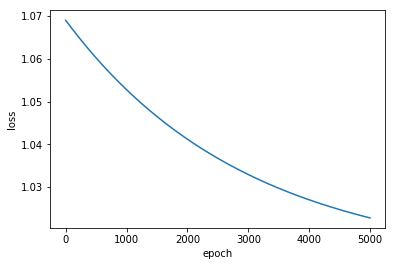

In [28]:
from matplotlib import pyplot as plt
plt.plot(training_loss,'-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

This example is meant just to illustrate the basic PyTorch machinery at work: it is not representative of true learning problems since there is no separate test set against which to evaluate the algorithm. We will use the MNIST dataset for our following experiments.

# Another way

This is another way to define a network in PyTorch: we define a class with its methods. 
It will be useful when we will create new methods to extract representations.

In [29]:
import torch.nn as nn

In [30]:
class Net(nn.Module):
    def __init__(self,din=784, dh=30, dout=10):
        super(Net, self).__init__()
        
        self.lin1 = nn.Linear(din, dh)
        self.lin2 = nn.Linear(dh, dout)
    
    def forward(self, x):    
        x = torch.sigmoid(self.lin1(x)) 
        return self.lin2(x)
    
    #-----------------------------------------------------#
    def extract(self,x):
        return torch.sigmoid(self.lin1(x))

In [31]:
model2 = Net(din,dh,dout).to(device)

In [32]:
print(model)
print(model2)

Sequential(
  (0): Linear(in_features=100, out_features=30, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=30, out_features=10, bias=True)
)
Net(
  (lin1): Linear(in_features=100, out_features=30, bias=True)
  (lin2): Linear(in_features=30, out_features=10, bias=True)
)


In [33]:
print(summary(model,input_size))
print(summary(model, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]           3,030
           Sigmoid-2                   [-1, 30]               0
            Linear-3                   [-1, 10]             310
Total params: 3,340
Trainable params: 3,340
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------
None
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]           3,030
           Sigmoid-2                   [-1, 30]               0
            Linear-3                   [-1, 10]             310
Total params: 3,340
Trainable params: 3,

In [34]:
assert(model2.extract(x).shape[1] == dh)

In [35]:
y  = model2.extract(x)
y

tensor([[0.4515, 0.5448, 0.5605,  ..., 0.6237, 0.3021, 0.3531],
        [0.5231, 0.7064, 0.4733,  ..., 0.4163, 0.3795, 0.7873],
        [0.3264, 0.4402, 0.6784,  ..., 0.5998, 0.4201, 0.3725],
        ...,
        [0.4375, 0.3923, 0.4917,  ..., 0.4537, 0.5668, 0.2750],
        [0.5744, 0.4922, 0.4707,  ..., 0.3696, 0.4645, 0.5120],
        [0.2984, 0.4837, 0.4934,  ..., 0.3914, 0.6729, 0.6389]],
       grad_fn=<SigmoidBackward>)